In [7]:
import tensorflow as tf
from visualisation_helper_functions import load_and_prep_image, pred_and_plot, plot_history


model = tf.keras.models.load_model('saved_trained_model/assets/saved_trained_model.h5')
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable

1/1 [==============================] - 0s 22ms/step


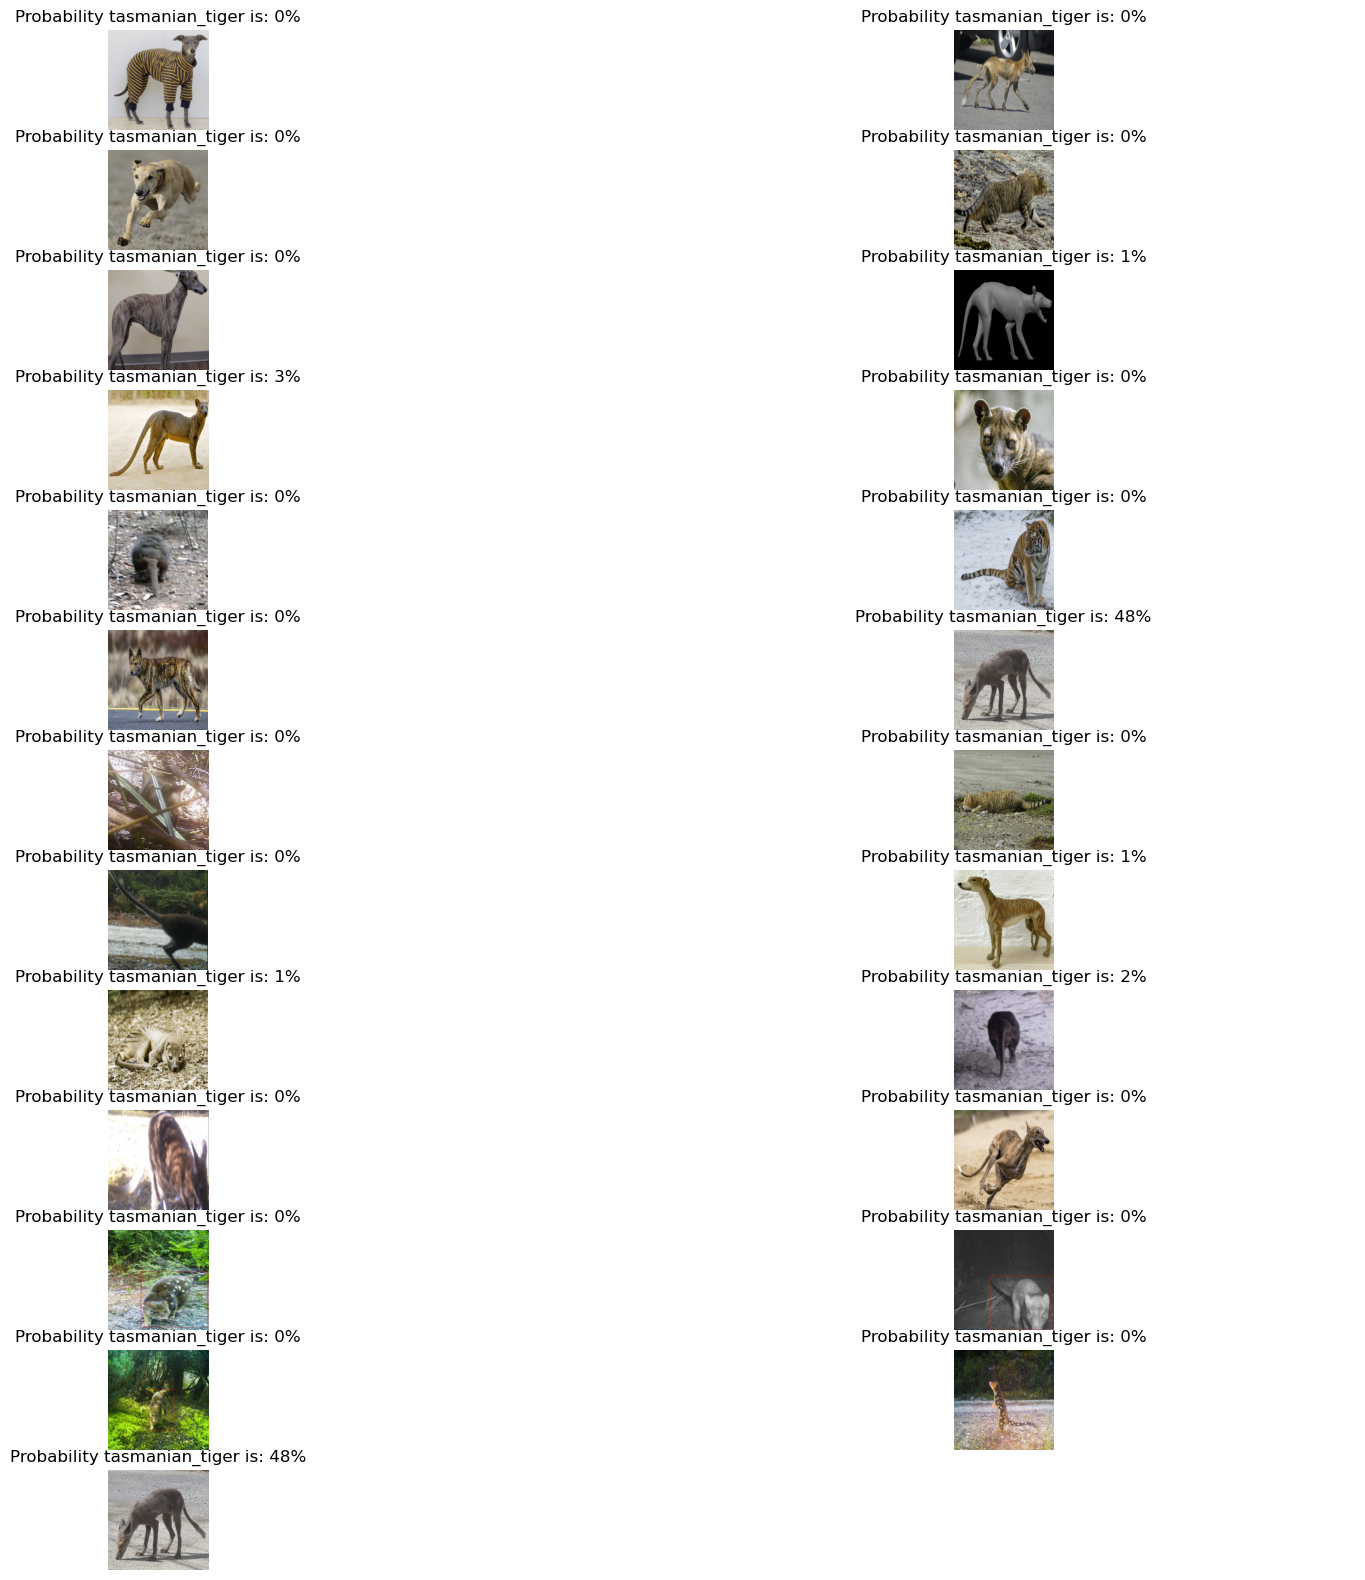

In [8]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

class ImageAnalyzer:
    def __init__(self, model, class_names=['not_tasmanian_tiger', 'tasmanian_tiger']):
        self.model = model
        self.class_names = class_names
    
    def load_and_prep_image(self, filename, img_shape=224):
        """
        Loads and pre-processes an image from a file.

        Parameters:
            filename (str): The path to the image file.
            img_shape (int): The desired size of the image. Defaults to 224.

        Returns:
            Tensor: A pre-processed image tensor with shape (img_shape, img_shape, 3).

        """

        # Read in the image
        img = tf.io.read_file(filename)

        # Decode image into tensor
        img = tf.io.decode_image(img, channels=3)

        # Resize the image
        img = tf.image.resize(img, [img_shape, img_shape])

        return img 


    def pred_and_plot(self, model, filename, class_names=None, ax=None):

        # Import the target image and preprocess it
        img = self.load_and_prep_image(filename)

        # Make a prediction
        pred = model.predict(tf.expand_dims(img, axis=0))
        if class_names is not None:
            pred_text = "Probability " + class_names[1] + " is: " + str(round(pred[0][0] * 100)) + "%"
        else:
            pred_text = "Probability: " + str(round(pred[0][0] * 100)) + "%"

        if ax is None:
            plt.imshow(img/255)
            plt.title(f"{pred_text}")
            plt.axis(False)
        else:
            ax.imshow(img/255)
            ax.set_title(f"{pred_text}")
            ax.axis(False)


    def plot_images(self, folder_path):
        # Get a list of all files in the folder
        files = os.listdir(folder_path)

        # Filter out non-image files
        image_files = [f for f in files if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

        # Set the number of columns and rows for the plot grid
        num_images = len(image_files)
        num_cols = min(num_images, 2)
        num_rows = (num_images - 1) // num_cols + 1

        # Create a new plot
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

        # Plot each image in the grid
        for i, ax in enumerate(axes.flatten()):
            if i < num_images:
                filename = os.path.join(folder_path, image_files[i])
                self.pred_and_plot(self.model, filename, class_names=self.class_names, ax=ax)
            else:
                ax.axis('off')

        # Show the plot
        plt.show()


        
classify = ImageAnalyzer(model)
classify.plot_images('kenji_tests/')